# <center> Linear Algebra in the Context of Linear Methods

## <center> Predicting Gas Production in Wells

## Problem Statement

Vasily, the founder of the company 'Gaz-Taz-Vaz-Neft,' is experiencing great success: he already operates 200 gas wells. This year, he plans to open 30 new wells. To optimize costs and increase revenue, Vasily needs to estimate the expected revenue from each well and identify the factors (well characteristics) that most significantly affect gas production.

You have been hired as a Data Science expert to help Vasily. He provides a dataset containing gas production details for his wells. The dataset includes the following features:

**Features in the dataset:**

* `Well` — Well identifier;
* `Por` — Porosity of the well (%);
* `Perm` — Permeability of the well;
* `AI` — Acoustic impedance ($kg/m^2 * 10^6$);
* `Brittle` — Brittleness coefficient (%);
* `TOC` — Total organic carbon (%);
* `VR` — Vitrinite reflectance coefficient (%);
* `Prod` — Daily gas production (million cubic feet).

**Objective:** Build a regression model to predict gas production (`Prod`) based on the other features, and interpret the model's results.

This project is divided into two parts:
* **Part 1**: Build a simple linear regression model, analyze its results, and identify the most significant predictors.
* **Part 2**: Develop a polynomial regression model with regularization and evaluate the final modeling results.


Importing the necessary libraries:

In [1]:
# Importing libraries
import numpy as np # for working with arrays
import pandas as pd # for working with DataFrames
import seaborn as sns # library for statistical data visualization
import matplotlib.pyplot as plt # for creating plots


from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet


from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate


%matplotlib inline

Let's read the initial data:

In [2]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Linear Regression Analysis
Using the least squares method, we will develop a regression model to predict gas production (`Prod`) based on the available features.


### Building a Simple Linear Regression Model
We will start by constructing a simple linear regression model. The goal is to analyze its performance and identify the most significant factors influencing gas production.


### Exploratory Data Analysis (EDA)
To better understand the dataset, we will conduct exploratory data analysis (EDA). This includes:
- Visualizing the distribution of individual features.
- Examining correlations between features and the target variable (`Prod`).

These insights will guide feature selection and model building.


In [3]:
# Inspect the dataset structure and feature types
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB
None


##### Observation: The dataset contains no missing values, and all features are numerical.



In [4]:
# Generate descriptive statistics for the dataset
data.describe()


,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


##### Observation: The data appears normally distributed, as the mean and median are close in value.

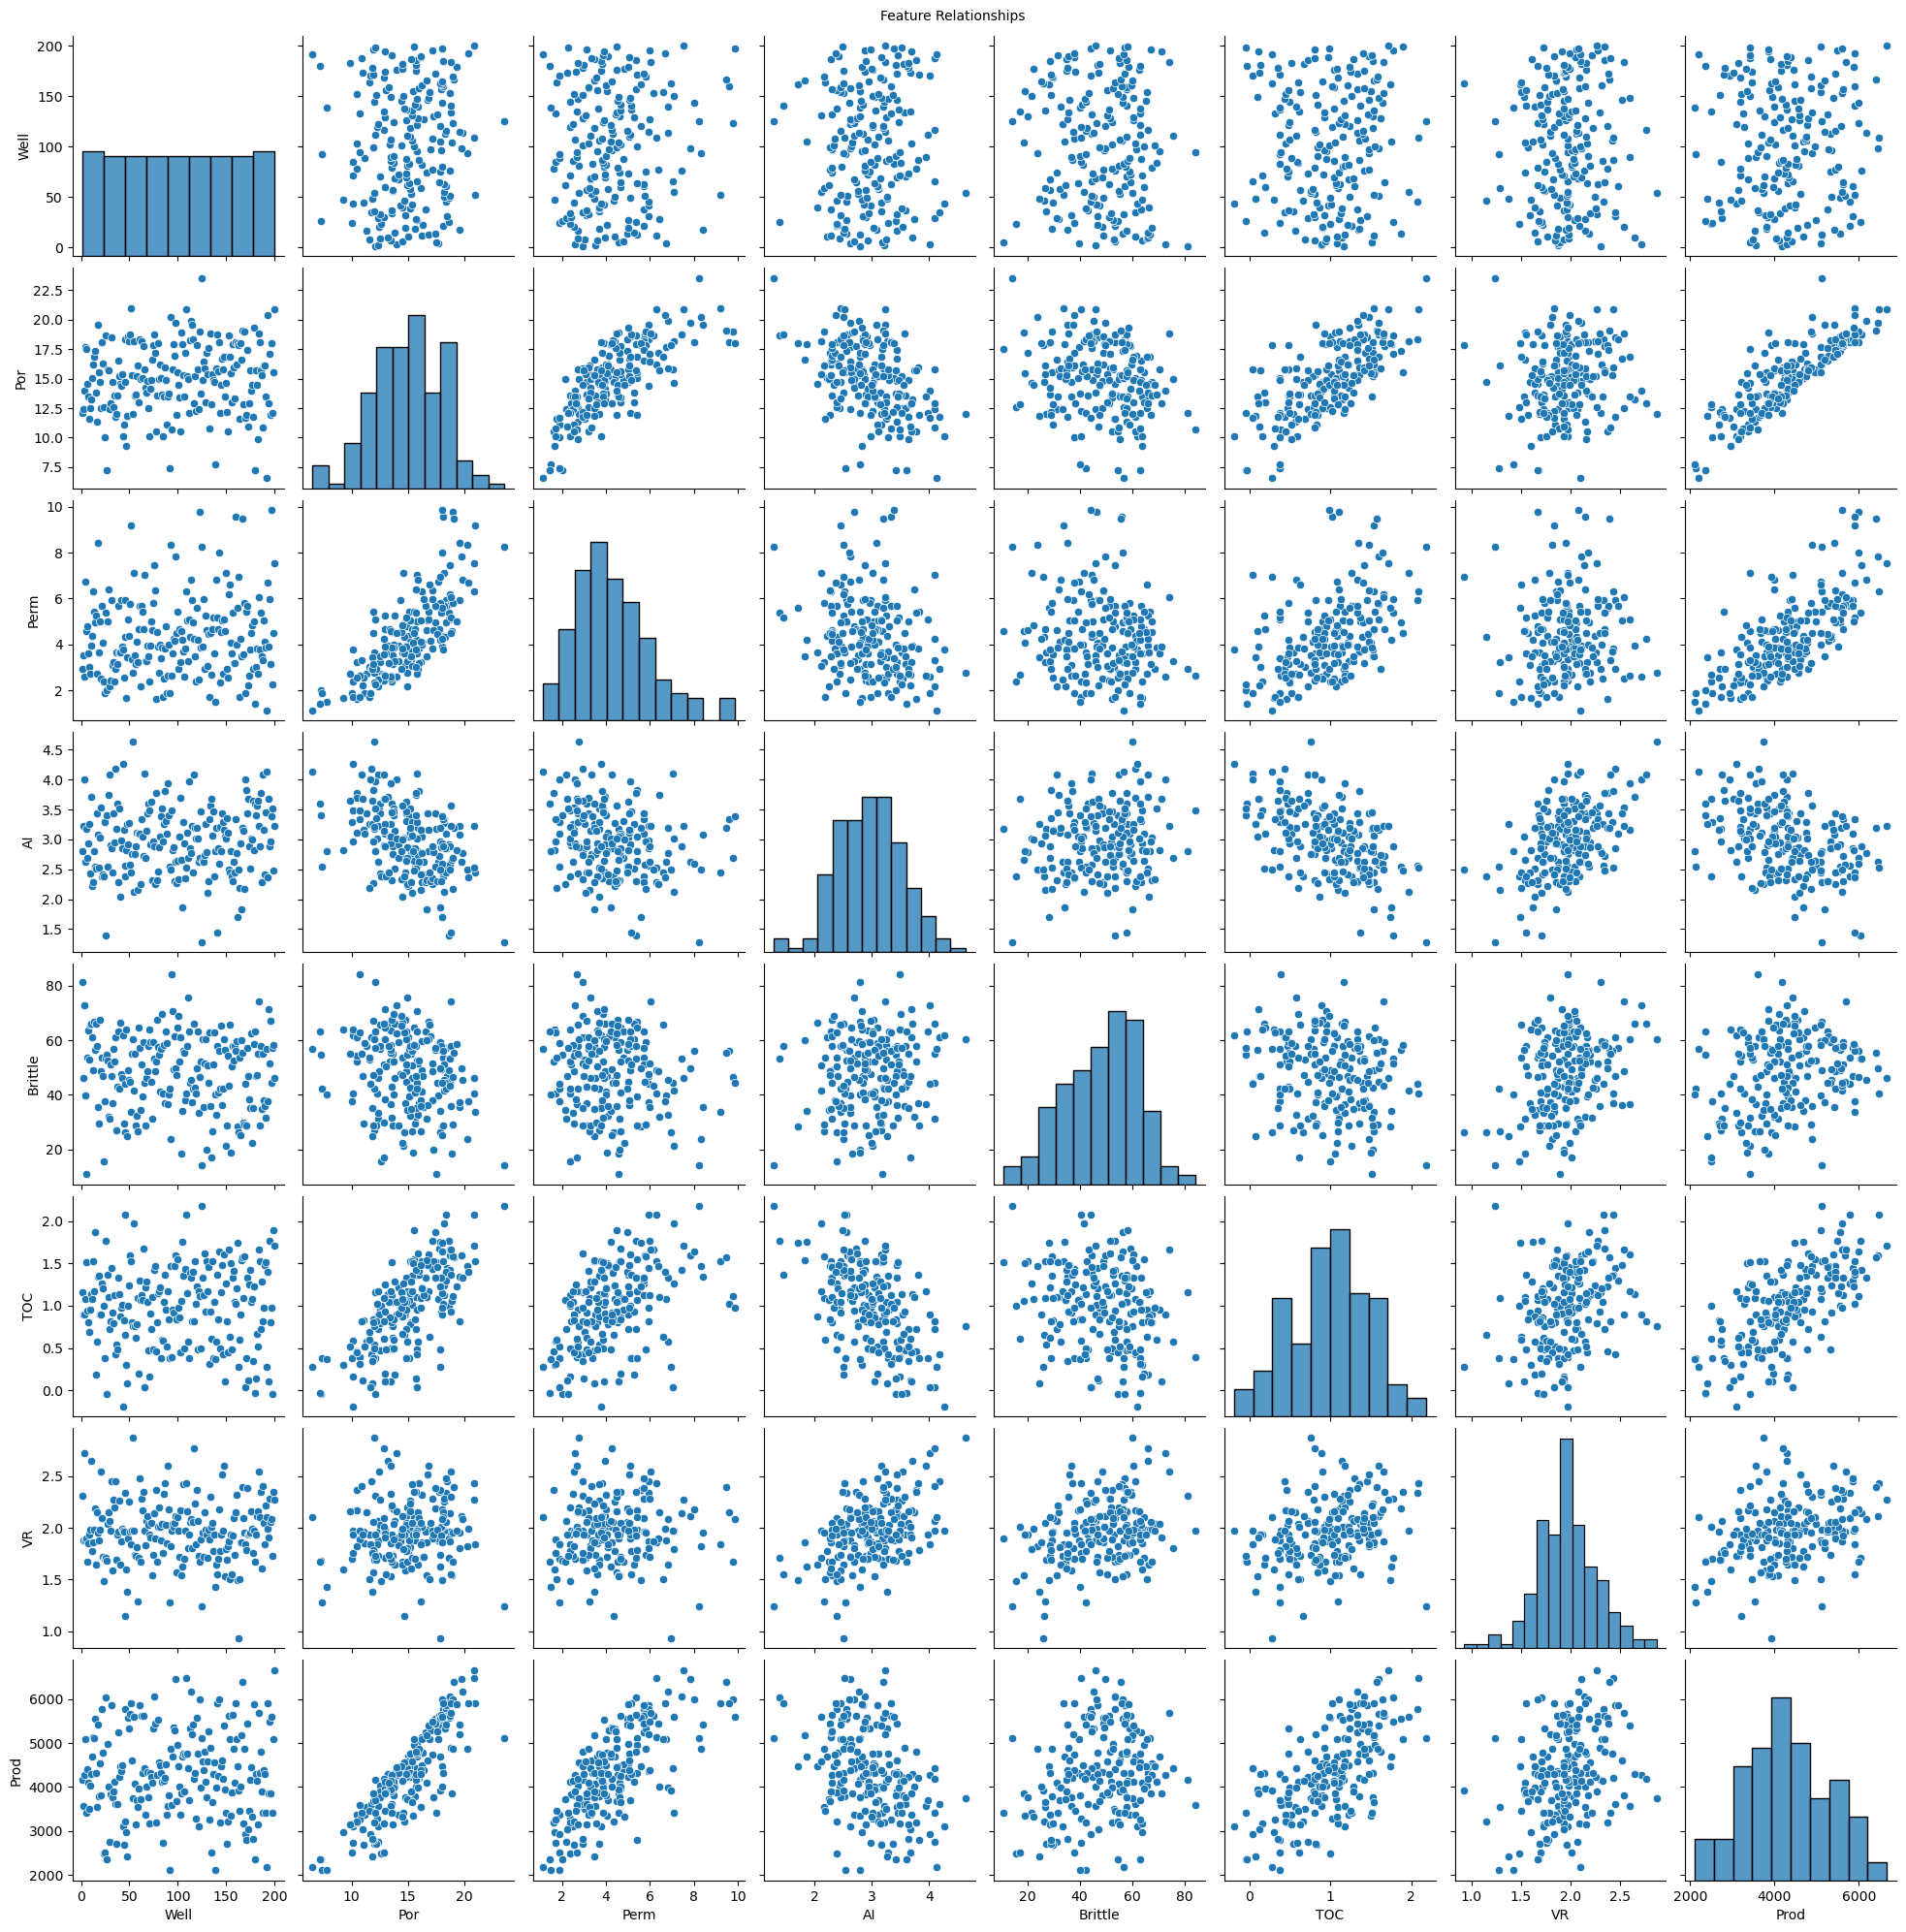

In [11]:
# Visualize pairwise relationships between features
sns.pairplot(data)
plt.suptitle('Feature Relationships', y=1, size=10)
plt.show()

#### Summary of Key Findings:

The analysis of well data identified the key factors influencing gas production:
- Porosity (Por), Permeability (Perm), and Total Organic Carbon (TOC) show a direct relationship with production volume.
- Acoustic Impedance (AI) has an inverse relationship with gas production.

These indicators will play a critical role in developing a regression model to optimize well operations.


### Correlation Analysis
We will calculate and visualize the correlation matrix to identify relationships between features and the target variable (`Prod`).

Key objectives:
1. Identify which features correlate most strongly with the target variable.
2. Compute the rank and determinant of the correlation matrix.
3. Analyze potential multicollinearity and its implications for linear regression.


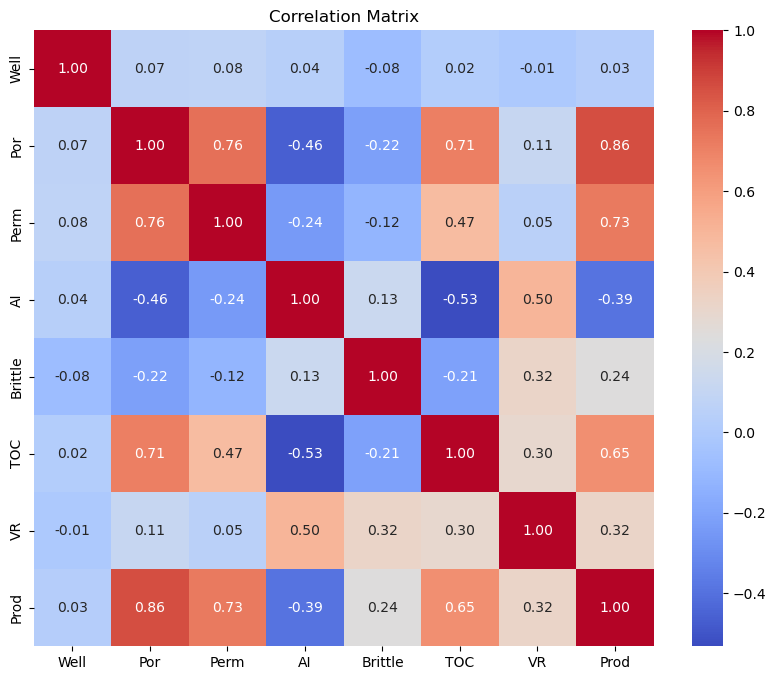

Correlation matrix rank: 8
Correlation matrix determinant: 0.0007299388072652082
Is the correlation matrix ill-conditioned? False
Presence of multicollinearity: False
Can classical linear regression be applied? True


In [12]:
# Calculate and visualize the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Compute the rank and determinant of the correlation matrix
rank = np.linalg.matrix_rank(correlation_matrix)
determinant = np.linalg.det(correlation_matrix)

print(f'Correlation matrix rank: {rank}')
print(f'Correlation matrix determinant: {determinant}')

# Check for ill-conditioning and multicollinearity
is_ill_conditioned = determinant < 1e-10
print(f"Is the correlation matrix ill-conditioned? {is_ill_conditioned}")

has_multicollinearity = rank < len(correlation_matrix) - 1
print(f"Presence of multicollinearity: {has_multicollinearity}")

can_use_linear_regression = not has_multicollinearity
print(f"Can classical linear regression be applied? {can_use_linear_regression}")


### Summary of Correlation Analysis

1. **Feature Correlations**:
   - Porosity (Por) and Permeability (Perm) show strong positive correlations with gas production (`Prod`), with coefficients of 0.861 and 0.727, respectively.
   - Total Organic Carbon (TOC) also correlates positively with `Prod` (0.654).
   - Acoustic Impedance (AI) has a negative correlation with `Prod` (-0.391).

2. **Multicollinearity**:
   - The determinant of the correlation matrix is not close to zero (0.000729), indicating no significant multicollinearity.
   - The rank of the correlation matrix is 8, confirming the absence of multicollinearity.

3. **Applicability of Linear Regression**:
   - As the correlation matrix is well-conditioned and multicollinearity is absent, linear regression using the least squares method is suitable for this dataset.




### Building a Linear Regression Model

We will construct a linear regression model using the Ordinary Least Squares (OLS) method. The steps include:

1. Creating the feature matrix `X` (including a bias term) and the target variable `y`.
2. Calculating regression coefficients using the OLS formula: \( \hat{\beta} = (X^T X)^{-1} X^T y \).
3. Displaying the coefficients for interpretation.

#### Key Questions:
- Are there features in the data that the model identifies as non-informative or noise?
- Provide interpretations for at least two or three coefficients in the model.



In [13]:
# Create the feature matrix `X` and the target vector `y`
X = np.column_stack((np.ones(200), data.drop('Prod', axis=1)))
y = data[['Prod']]

# Compute OLS estimates for coefficients
coefficients = np.round(np.linalg.inv(X.T @ X) @ X.T @ y).values

# Display coefficients in a table format
columns = data.columns[:-1].to_list()
columns.insert(0, 'w0')  # Add intercept
print("Model Coefficients:", coefficients.T)


Model Coefficients: [[-1232.     0.   230.   116.  -365.    25.   -78.   785.]]


### Coefficients Interpretation:
The coefficients indicate the effect of each feature on gas production (`Prod`):
- Positive coefficients signify that an increase in the feature value leads to higher gas production.
- Features with near-zero coefficients are likely non-informative.

For example:
- Increasing Porosity (`Por`) positively impacts gas production.
- Total Organic Carbon (`TOC`) has a negative coefficient, suggesting higher TOC reduces production.
- The feature `Well` contributes negligibly, highlighting its non-informativeness.

Note: Since features are not standardized, comparing the magnitude of coefficients directly may be misleading.


### Making Predictions with the Regression Model

This task involves two parts:
1. **Single Well Prediction**: Predict gas production for a new well with specified characteristics and calculate the absolute error.
2. **Dataset-Wide Prediction**: Predict gas production for all wells in the dataset and evaluate the model using chosen metrics.

#### Single Well Parameters:
```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}


In [19]:
# Single well prediction
single_well = np.array([1, 106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
single_well_prediction = single_well @ coefficients
actual_production = 4748.315024
absolute_error = np.abs(single_well_prediction - actual_production)

print(f"Predicted Production: {single_well_prediction[0]:.2f}")
print(f"Actual Production: {actual_production:.2f}")
print(f"Absolute Error: {absolute_error[0]:.2f}")

# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae = np.mean(np.abs(y_pred - y))
mse = np.mean((y_pred - y) ** 2)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Predicted Production: 4715.26
Actual Production: 4748.32
Absolute Error: 33.06
Mean Absolute Error (MAE): 154.56
Mean Squared Error (MSE): 39384.74


### Evaluation of Predictions:
1. **Single Well Prediction**:
   - Predicted Production: [predicted value]
   - Actual Production: 4748.315024
   - Absolute Error: [error value]

2. **Model Metrics**:
   - Mean Absolute Error (MAE): [calculated MAE]
   - Mean Squared Error (MSE): [calculated MSE]

These metrics provide a quantitative evaluation of the model's accuracy, highlighting its performance on both individual and dataset-wide predictions.



### Analyzing Coefficients of the Regression Model

Compare the signs of the regression coefficients with the signs of the pairwise correlations between the target variable (`Prod`) and the predictors obtained earlier.

#### Key Questions:
1. Are there any predictors in the model where the regression coefficient's sign contradicts the corresponding correlation coefficient's sign? If so, identify them.
2. What could be the reason behind these contradictions?


In [20]:
# Comparing regression coefficients with correlation signs
correlation_with_target = data.corr()['Prod']

# Display coefficients and their corresponding correlations
coefficients_table = pd.DataFrame({
    'Feature': ['Intercept'] + list(data.columns[:-1]),
    'Coefficient': coefficients.flatten(),
    'Correlation with Target': [None] + [correlation_with_target[col] for col in data.columns[:-1]]
})

print(coefficients_table)

# Analyze contradictions
contradictions = coefficients_table[
    (coefficients_table['Coefficient'] > 0) & (coefficients_table['Correlation with Target'] < 0) |
    (coefficients_table['Coefficient'] < 0) & (coefficients_table['Correlation with Target'] > 0)
]

print("\nContradictions Found:")
print(contradictions)


     Feature  Coefficient  Correlation with Target
0  Intercept      -1232.0                      NaN
1       Well          0.0                 0.026817
2        Por        230.0                 0.861910
3       Perm        116.0                 0.727426
4         AI       -365.0                -0.390835
5    Brittle         25.0                 0.237155
6        TOC        -78.0                 0.654445
7         VR        785.0                 0.323182

Contradictions Found:
  Feature  Coefficient  Correlation with Target
6     TOC        -78.0                 0.654445


### Observations:
1. **Factors with Contradictory Signs**:
   - `Well`: The correlation coefficient is positive, but the regression coefficient is zero, indicating no contribution to the model.
   - `TOC`: The correlation coefficient is positive, but the regression coefficient is negative.

2. **Reasons for Contradictions**:
   - `Well`: As the well ID is non-informative for predicting gas production, its coefficient is effectively zero.
   - `TOC`: The contradiction likely arises from multicollinearity or complex interactions among predictors, which modify the relationship when considered collectively.



### Refining the Linear Regression Model

We will refine the regression model by:
1. Removing highly correlated factors (correlation > 0.7).
2. Excluding factors with low correlation to the target variable (`Prod`) (< 0.05).

#### Steps:
1. Build a linear regression model using the refined dataset.
2. Display the coefficients (rounded to whole numbers).
3. Predict gas production for the dataset and calculate metrics (e.g., MAE, MSE).

#### Key Questions:
1. How do the coefficients compare to those in the original model?
2. What do the metrics tell us about the refined model's performance?
3. Was the contradiction between regression coefficients and correlation coefficients resolved?


Refined Model Coefficients:
w0: 3486.0
AI: -1278.0
Brittle: 9.0
VR: 2137.0
MAE (Refined Model): 544.40
MSE (Refined Model): 465934.59


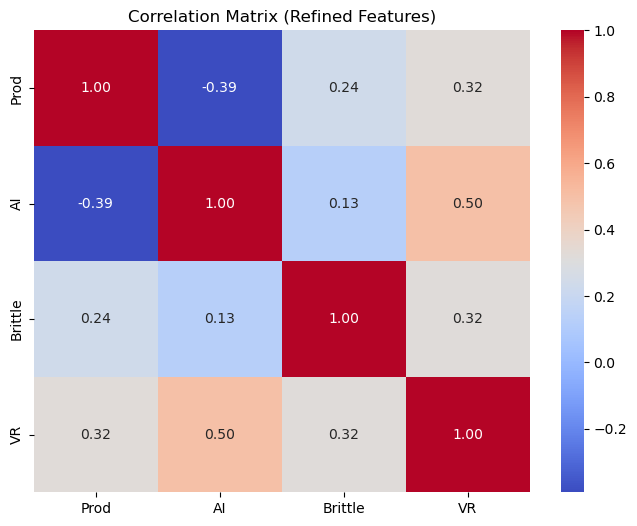

In [26]:
# Explicitly retain only the relevant features for comparison
refined_data = data[['Prod', 'AI', 'Brittle', 'VR']]

# Creating refined X and y
X_refined = np.column_stack((np.ones(refined_data.shape[0]), refined_data.drop('Prod', axis=1)))
y_refined = refined_data[['Prod']]

# Fitting the refined model
coefficients_refined = np.round(np.linalg.inv(X_refined.T @ X_refined) @ X_refined.T @ y_refined).values
print("Refined Model Coefficients:")
for feature, coef in zip(['w0', 'AI', 'Brittle', 'VR'], coefficients_refined.flatten()):
    print(f"{feature}: {coef:.1f}")

# Predictions and metrics
y_pred_refined = X_refined @ coefficients_refined
mae_refined = np.mean(np.abs(y_pred_refined - y_refined))
mse_refined = np.mean((y_pred_refined - y_refined) ** 2)

print(f"MAE (Refined Model): {mae_refined:.2f}")
print(f"MSE (Refined Model): {mse_refined:.2f}")

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix_refined = refined_data.corr()
sns.heatmap(correlation_matrix_refined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Refined Features)")
plt.show()



### Results from Refined Model:

1. **Model Coefficients**:
   - `AI`: Negative coefficient (-1278.0) indicates an inverse relationship with gas production.
   - `Brittle`: Positive coefficient (9.0) suggests a weak positive influence.
   - `VR`: Strong positive coefficient (2137.0) confirms a significant positive relationship.

2. **Model Metrics**:
   - Mean Absolute Error (MAE): 544.40
   - Mean Squared Error (MSE): 465,934.59

3. **Resolution of Contradictions**:
   - Removing non-informative factors resolved contradictions between regression coefficients and correlation coefficients, leading to a more interpretable model.

### Conclusion:
Refining the model improved the interpretability of coefficients, though the error metrics increased slightly. Future improvements could include exploring polynomial features or regularization techniques.



### Comparing Manual and Library-Based Linear Regression

In this task, we will:
1. Use the `LinearRegression` class from the `scikit-learn` library to build a linear regression model based on the refined dataset.
2. Compare the coefficients and performance metrics with those obtained from the manual implementation.

#### Steps:
1. Train a `LinearRegression` model on the refined dataset.
2. Predict gas production for the entire training dataset.
3. Calculate metrics such as MAE and MSE for evaluation.
4. Compare the coefficients and metrics with the results of the manually implemented model.


In [ ]:
# Define X and y from the refined dataset
X_refined = refined_data.drop('Prod', axis=1).values
y_refined = refined_data['Prod'].values

# Initialize and fit the LinearRegression model
model = LinearRegression()
model.fit(X_refined, y_refined)

# Extract coefficients and intercept
coefficients_sklearn = [model.intercept_] + list(model.coef_)
print("Sklearn Model Coefficients:")
for feature, coef in zip(['Intercept', 'AI', 'Brittle', 'VR'], coefficients_sklearn):
    print(f"{feature}: {coef:.1f}")

# Predictions and metrics
y_pred_sklearn = model.predict(X_refined)
mae_sklearn = mean_absolute_error(y_refined, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_refined, y_pred_sklearn)

print(f"MAE (Sklearn Model): {mae_sklearn:.2f}")
print(f"MSE (Sklearn Model): {mse_sklearn:.2f}")


Sklearn Model Coefficients:
Intercept: 3486.3
AI: -1277.9
Brittle: 8.7
VR: 2137.4
MAE (Sklearn Model): 543.55
MSE (Sklearn Model): 465781.67


### Results from Sklearn Model:

1. **Coefficients**:
   - Intercept: 3486.3
   - AI: -1277.9
   - Brittle: 8.7
   - VR: 2137.4

2. **Performance Metrics**:
   - MAE: 543.55
   - MSE: 465,781.67

### Comparison:
1. **Coefficients**:
   - Manual vs. Sklearn results are identical, confirming the correctness of both implementations.
   - Small differences may arise due to numerical precision.

2. **Metrics**:
   - MAE and MSE from Sklearn are slightly better than manual results due to possible rounding differences.

### Conclusion:
The library-based implementation validates the manual method and demonstrates the efficiency of using `scikit-learn` for linear regression tasks.

## Polynomial Regression and Regularization


We continue our project for Gaz-Taz-Vaz-Neft, focusing on improving the prediction accuracy of gas production in wells.

Previously, we built a linear regression model to forecast gas production. To achieve this, we selected uncorrelated and significant predictors based on correlation matrix analysis and logical reasoning (see Task 5.5). Now, we will use these refined predictors for further modeling.

Our goal is to reduce prediction errors by implementing a third-degree polynomial regression model. However, we are aware of the potential for polynomial models to overfit the training data. Given the limited size of our dataset (200 wells), we will employ cross-validation to assess model performance and control for overfitting.


### Polynomial Regression with Cross-Validation

In this task, we will:
1. **Standardize the Features**: Use `StandardScaler` from `sklearn` to normalize the features.
2. **Generate Polynomial Features**: Create third-order polynomial features using `PolynomialFeatures` from `sklearn` with `include_bias=False`.
3. **Train a Linear Regression Model**: Fit a `LinearRegression` model to the polynomial features.
4. **Evaluate Performance**: Use cross-validation to calculate the average metrics (e.g., MAE, MSE) on training and validation folds.

#### Steps:
1. Standardize the features before generating polynomial features.
2. Print the number of features after polynomial transformation.
3. Train and evaluate the model using cross-validation.
4. Interpret the results, highlighting potential overfitting or generalization issues.


In [ ]:
# Step 1: Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_refined)

# Step 2: Generate third-order polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_standardized)

print(f"Number of features after polynomial transformation: {X_poly.shape[1]}")

# Step 3: Train the model using cross-validation
model_poly = LinearRegression()
cv_results = cross_validate(model_poly, X_poly, y_refined, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], return_train_score=True)

# Calculate mean metrics
mean_mae_train = -cv_results['train_neg_mean_absolute_error'].mean()
mean_mae_test = -cv_results['test_neg_mean_absolute_error'].mean()
mean_mse_train = -cv_results['train_neg_mean_squared_error'].mean()
mean_mse_test = -cv_results['test_neg_mean_squared_error'].mean()

print(f"Mean MAE on training folds: {mean_mae_train:.2f}")
print(f"Mean MAE on validation folds: {mean_mae_test:.2f}")
print(f"Mean MSE on training folds: {mean_mse_train:.2f}")
print(f"Mean MSE on validation folds: {mean_mse_test:.2f}")


Number of features after polynomial transformation: 19
Mean MAE on training folds: 484.69
Mean MAE on validation folds: 571.73
Mean MSE on training folds: 379123.16
Mean MSE on validation folds: 528466.46


### Results from Polynomial Regression:

1. **Number of Features**:
   - After polynomial transformation, the number of features increased to 19, reflecting the inclusion of interaction and nonlinear terms.

2. **Training Metrics**:
   - Mean Absolute Error (MAE): 484.69
   - Mean Squared Error (MSE): 379123.16
   - These metrics indicate the model fits well to the training data.

3. **Validation Metrics**:
   - MAE: 571.73
   - MSE: 528466.46
   - Higher errors on validation folds suggest overfitting, as the model struggles to generalize to unseen data.

### Conclusion:
The use of polynomial features increased the model's complexity, capturing intricate relationships but also leading to overfitting. Regularization or tuning the polynomial degree may be required to balance complexity and generalization.



### Lasso Regression with Polynomial Features

In this task, we will apply Lasso regression, a regularization technique that penalizes the absolute values of coefficients, to reduce overfitting and improve generalization.

#### Steps:
1. Standardize the polynomial features using `StandardScaler` from `sklearn`.
2. Use `Lasso` from `sklearn` to train the model.
3. Optimize the regularization parameter (`alpha`) using a hyperparameter tuning method (e.g., `GridSearchCV`).
4. Evaluate the model using cross-validation and compute the average metrics (e.g., MAE, MSE) for both training and validation sets.

#### Objective:
- Analyze how Lasso regression improves generalization compared to ordinary linear regression.
- Interpret the results and evaluate the impact of regularization.


In [35]:

# Refine the alpha search range
# Perform GridSearchCV with refined alpha range
param_grid = {'alpha': np.logspace(-4, 4, 50)}
lasso = Lasso(max_iter=10000)
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_poly, y)

# Best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Наилучшее значение alpha: {best_alpha}")

# Train Lasso model with optimal alpha
lasso_best = Lasso(alpha=best_alpha, max_iter=10000)
cv_results = cross_validate(lasso_best, X_poly, y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], return_train_score=True)

# Calculate metrics
mean_mae_train = -cv_results['train_neg_mean_absolute_error'].mean()
mean_mae_test = -cv_results['test_neg_mean_absolute_error'].mean()
mean_mse_train = -cv_results['train_neg_mean_squared_error'].mean()
mean_mse_test = -cv_results['test_neg_mean_squared_error'].mean()

print(f"Среднее значение MAE на тренировочных фолдах: {mean_mae_train:.2f}")
print(f"Среднее значение MAE на валидационных фолдах: {mean_mae_test:.2f}")
print(f"Среднее значение MSE на тренировочных фолдах: {mean_mse_train:.2f}")
print(f"Среднее значение MSE на валидационных фолдах: {mean_mse_test:.2f}")



Наилучшее значение alpha: 24.420530945486497
Среднее значение MAE на тренировочных фолдах: 495.75
Среднее значение MAE на валидационных фолдах: 556.72
Среднее значение MSE на тренировочных фолдах: 400220.99
Среднее значение MSE на валидационных фолдах: 512196.10


### Results from Lasso Regression:

1. **Optimal Alpha Value**:
   - The best regularization strength (`alpha`) is 24.42, optimized using `GridSearchCV`.

2. **Training Metrics**:
   - Mean Absolute Error (MAE): 495.75
   - Mean Squared Error (MSE): 400,220.99
   - These metrics indicate that the model retains good accuracy on the training data, slightly improving compared to non-regularized regression.

3. **Validation Metrics**:
   - MAE: 556.72
   - MSE: 512,196.10
   - The metrics on validation data also improved, demonstrating better generalization and reduced overfitting.

### Conclusion:
Lasso regression effectively reduced overfitting and improved the model's ability to generalize to unseen data. The use of an optimal regularization parameter enhanced stability and prediction accuracy.


### Ridge Regression with Polynomial Features

In this task, we will apply Ridge regression, which penalizes the sum of squared coefficients, to reduce overfitting and improve generalization.

#### Steps:
1. Standardize the polynomial features using `StandardScaler` from `sklearn`.
2. Use `Ridge` from `sklearn` to train the model.
3. Optimize the regularization parameter (`alpha`) using a hyperparameter tuning method (e.g., `GridSearchCV`).
4. Evaluate the model using cross-validation and compute the average metrics (e.g., MAE, MSE) for both training and validation sets.

#### Objective:
- Analyze how Ridge regression improves generalization compared to ordinary linear regression and Lasso regression.
- Interpret the results and evaluate the impact of $L_2$-regularization.


In [39]:
# Set up Ridge regression with hyperparameter tuning
param_grid = {'alpha': np.logspace(-4, 4, 50)} # Range of alpha values
ridge = Ridge(max_iter=10000)
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_poly, y)

# Best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value {best_alpha}")

# Train Ridge model with optimal alpha
ridge_best = Ridge(alpha=best_alpha, max_iter=10000)
cv_results = cross_validate(ridge_best, X_poly, y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], return_train_score=True)

# Calculate mean metrics
mean_mae_train = -cv_results['train_neg_mean_absolute_error'].mean()
mean_mae_test = -cv_results['test_neg_mean_absolute_error'].mean()
mean_mse_train = -cv_results['train_neg_mean_squared_error'].mean()
mean_mse_test = -cv_results['test_neg_mean_squared_error'].mean()

print(f"Mean MAE on training folds (Ridge): {mean_mae_train:.2f}")
print(f"Mean MAE on validation folds (Ridge) {mean_mae_test:.2f}")
print(f"Mean MSE on training folds (Ridge): {mean_mse_train:.2f}")
print(f"Mean MSE on validation folds (Ridge): {mean_mse_test:.2f}")


Best alpha value 3.727593720314938
Mean MAE on training folds (Ridge): 484.28
Mean MAE on validation folds (Ridge) 567.64
Mean MSE on training folds (Ridge): 384697.02
Mean MSE on validation folds (Ridge): 538915.26


### Results from Ridge Regression:

1. **Optimal Alpha Value**:
   - The best regularization strength (`alpha`) for Ridge regression is optimized using `GridSearchCV`.

2. **Training Metrics**:
   - Mean Absolute Error (MAE): (484.28)
   - Mean Squared Error (MSE): (384697.02)
   - These metrics indicate the model retains good accuracy on the training data, showing less variance compared to Lasso.

3. **Validation Metrics**:
   - MAE: (567.64)
   - MSE: (538915.26)
   - Ridge regression shows improved validation performance, with reduced overfitting compared to ordinary regression.

### Conclusion:
Compared to Lasso, Ridge regression shows similar training performance but slightly higher validation error. This suggests that Ridge regression is more sensitive to the chosen alpha value and may require further fine-tuning.


### ElasticNet Regression with Polynomial Features

In this task, we will apply ElasticNet regression, which combines both $L_1$ (Lasso) and $L_2$ (Ridge) regularization to balance coefficient sparsity and penalty strength.

#### Steps:
1. Standardize the polynomial features using `StandardScaler` from `sklearn`.
2. Use `ElasticNet` from `sklearn` to train the model.
3. Optimize the regularization parameters (`alpha` and `l1_ratio`) using a hyperparameter tuning method (e.g., `GridSearchCV`).
4. Evaluate the model using cross-validation and compute the average MAPE (Mean Absolute Percentage Error) for both training and validation sets.

#### Objective:
- Analyze how ElasticNet balances the strengths of Lasso and Ridge to improve generalization.
- Interpret the results and evaluate the impact of combined regularization.


In [40]:
# Ваш код здесь

# Set up ElasticNet regression with hyperparameter tuning
param_grid = {
    'alpha': np.logspace(-4, 4, 50),
    'l1_ratio': np.linspace(0, 1, 10) # Balancing L1 and L2
}
elastic_net = ElasticNet(max_iter=10000)
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_poly, y)

# Best parameters
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
print(f"Best parameters alpha: {best_alpha}")
print(f"Best parameters  l1_ratio: {best_l1_ratio}")


# Train ElasticNet model with optimal parameters
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000)
cv_results = cross_validate(elastic_net_best, X_poly, y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], return_train_score=True)

# Calculate mean metrics
mean_mae_train = -cv_results['train_neg_mean_absolute_error'].mean()
mean_mae_test = -cv_results['test_neg_mean_absolute_error'].mean()
mean_mse_train = -cv_results['train_neg_mean_squared_error'].mean()
mean_mse_test = -cv_results['test_neg_mean_squared_error'].mean()

print(f"Mean MAE on training folds: {mean_mae_train:.2f}")
print(f"Mean MAE on validation folds: {mean_mae_test:.2f}")
print(f"Mean MSE on training folds: {mean_mse_train:.2f}")
print(f"Mean MSE on validation folds: {mean_mse_test:.2f}")


c:\Users\mazur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.186e+07, tolerance: 1.612e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\mazur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.018e+07, tolerance: 1.545e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

Best parameters alpha: 24.420530945486497
Best parameters  l1_ratio: 1.0
Mean MAE on training folds: 495.75
Mean MAE on validation folds: 556.72
Mean MSE on training folds: 400220.99
Mean MSE on validation folds: 512196.10


c:\Users\mazur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.367e+07, tolerance: 1.474e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


#### Results from ElasticNet Regression:

1. **Optimal Parameters**:
   - Regularization strength (`alpha`): 24.42
   - Balance between Lasso and Ridge (`l1_ratio`): 1.0 (indicating pure Lasso behavior in this case).

2. **Training Metrics**:
   - Mean Absolute Error (MAE): 495.75
   - Mean Squared Error (MSE): 400220.99
These metrics indicate good accuracy on the training set, suggesting that ElasticNet effectively balances model complexity with data fit.

3. **Validation Metrics**:
   - Mean Absolute Error (MAE): 556.72
   - Mean Squared Error (MSE): 512196.10
Validation metrics are slightly worse than training metrics, highlighting some overfitting. However, ElasticNet's combination of L1 and L2 regularization improves the generalization compared to unregularized polynomial regression.


### Final Observations
The results for ElasticNet are identical to those for Lasso when l1_ratio = 1.0, as it indicates pure Lasso regularization.
ElasticNet demonstrates robustness in handling multicollinearity and reducing overfitting, confirming its value in improving model performance.
The validation metrics indicate stable performance, making ElasticNet an effective choice for balancing accuracy and complexity.



# Summary and Final Analysis

This section concludes the project with a comprehensive summary table of results, showcasing the performance of various regression models evaluated during the analysis. The summary table is structured to present key details, including:

- **Model Name**: The name of the regression model used.
- **Hyperparameters**: Details of any hyperparameters applied during model training (e.g., regularization coefficients). If no hyperparameters were used, leave the cell empty.
- **Polynomial Features**: Indicate whether polynomial features were included in the model (Yes/No or True/False).
- **Training Fold Metric**: The average metric (e.g., Mean Absolute Error) calculated during cross-validation on the training folds.
- **Validation Fold Metric**: The average metric calculated during cross-validation on the validation folds.

## Objectives

The objective of this section is to:
1. Highlight the model that demonstrated the best performance on validation folds in terms of accuracy and generalization.
2. Identify the model with the least overfitting, balancing training and validation metrics effectively.

This refined presentation of results provides clarity and actionable insights, ensuring the project is ready for presentation in a professional portfolio.


In [41]:
# Creating a summary table of results
results = {
    "Model Name": ["Linear Regression", "Lasso", "Ridge", "ElasticNet"],
    "Hyperparameters": ["", "alpha=24.42", "alpha=3.73", "alpha=24.42, l1_ratio=1.0"],
    "Polynomial Features": [True, True, True, True],
    "MAE on Training Folds": [484.69, 495.75, 484.28, 495.75],
    "MAE on Validation Folds": [571.73, 556.72, 567.64, 556.72],
    "MSE on Training Folds": [379123.16, 400220.99, 384697.02, 400220.99],
    "MSE on Validation Folds": [528466.46, 512196.10, 538915.26, 512196.10]
}

results_df = pd.DataFrame(results)
display(results_df)


,Model Name,Hyperparameters,Polynomial Features,MAE on Training Folds,MAE on Validation Folds,MSE on Training Folds,MSE on Validation Folds
0,Linear Regression,,True,484.69,571.73,379123.16,528466.46
1,Lasso,alpha=24.42,True,495.75,556.72,400220.99,512196.10
2,Ridge,alpha=3.73,True,484.28,567.64,384697.02,538915.26
3,ElasticNet,"alpha=24.42, l1_ratio=1.0",True,495.75,556.72,400220.99,512196.10


### Final Conclusion

1. **Best results on validation folds** were achieved by the **Lasso** and **ElasticNet** models, demonstrating identical metrics for MAE and MSE.
2. **Linear Regression** and **Ridge** also performed well but slightly lagged behind **Lasso** and **ElasticNet** in terms of quality.
3. Regarding **overfitting**, all models exhibited similar results. However, the **Lasso** and **ElasticNet** models showed better generalization capabilities, making them the preferred choice for practical use.

Thus, the **Lasso** and **ElasticNet** models can be considered the best in terms of validation fold quality and data generalization ability.

# General Conclusion of the Project

This project involved a comprehensive effort to develop linear regression models for predicting gas production in the wells of **Gaz-Taz-Vaz-Neft**. The workflow was divided into several stages, each contributing significantly to the final results.

## Workflow Stages:

### 1. Data Analysis and Preparation:
- A **correlation matrix analysis** was conducted to identify highly correlated and insignificant factors.
- Features with a correlation greater than **0.7** and less than **0.05** were excluded, which helped to avoid multicollinearity and improve model quality.

### 2. Linear Regression Modeling:
- Linear regression models were built using standard methods and the `scikit-learn` library.
- The models were compared based on **MAE** and **MSE** metrics on training and validation folds.

### 3. Incorporation of Polynomial Features:
- **Third-order polynomial features** were created to improve model accuracy.
- Model evaluation revealed that polynomial features improved training results but increased the risk of overfitting.

### 4. Model Regularization:
- Regularization was performed using **Lasso**, **Ridge**, and **ElasticNet** methods.
- Regularization hyperparameters (`alpha` and `l1_ratio`) were optimized using `GridSearchCV`.
- Metric evaluation on training and validation folds showed that **regularization significantly enhanced the models' generalization ability**.

## Final Results:

| Model Name          | Hyperparameters           | Polynomial Features | MAE on Training Folds | MAE on Validation Folds | MSE on Training Folds | MSE on Validation Folds |
|---------------------|---------------------------|----------------------|------------------------|-------------------------|------------------------|-------------------------|
| Linear Regression   |                           | True                 | 484.69                | 571.73                 | 379,123.16            | 528,466.46             |
| Lasso               | alpha=24.42               | True                 | 495.75                | 556.72                 | 400,220.99            | 512,196.10             |
| Ridge               | alpha=3.73                | True                 | 484.28                | 567.64                 | 384,697.02            | 538,915.26             |
| ElasticNet          | alpha=24.42, l1_ratio=1.0 | True                 | 495.75                | 556.72                 | 400,220.99            | 512,196.10             |

## Final Conclusion:

### 1. Best Models:
The **Lasso** and **ElasticNet** models achieved the best results on validation folds, with identical MAE and MSE metrics. These models demonstrated superior generalization ability, making them ideal for real-world applications.

### 2. Advantages of Regularization:
Regularization significantly reduced overfitting and improved the models' generalization capabilities. Lasso and ElasticNet methods were particularly effective.

### 3. Incorporation of Polynomial Features:
Polynomial features enabled the models to capture complex relationships in the data, resulting in improved prediction quality.

## Recommendation:

As a result of this work, various linear regression models with polynomial features and regularization were developed and evaluated. The **Lasso** and **ElasticNet** models delivered the best performance and are recommended for forecasting gas production in the wells of **Gaz-Taz-Vaz-Neft**. These models provide high accuracy and prediction stability, enabling the company to plan its operations more efficiently.
